## Variable star period search and light curve fitting

In [1]:
import matplotlib.pyplot as mp
%matplotlib inline
import lcv_fitting as lcv
import numpy as np

### Read in star data

In [5]:
lc_name = 'NGC3201_V29'
filters, data = lcv.read_lcv('test_lcvs/'+lc_name+'.lcv')

# subarrays with single filter
V_band = data[data['filter'] == 'V']
B_band = data[data['filter'] == 'B']
R_band = data[data['filter'] == 'R']
I1_band = data[data['filter'] == 'I1']

print(np.floor(-6.8))

-7.0


### Do Lomb-Scargle to get first guess of period

1e-07


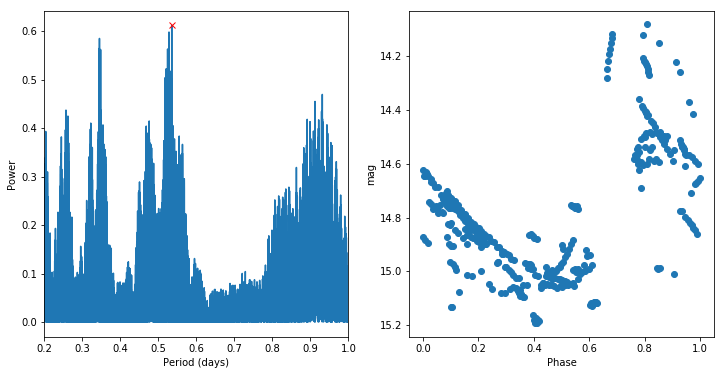

0.5355197
1e-07


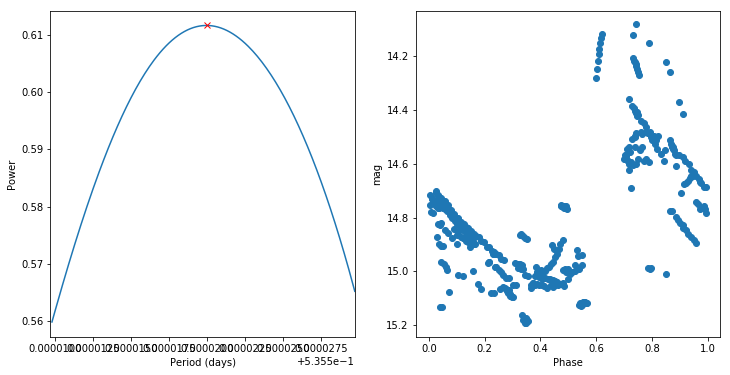

0.53552


In [6]:
# Bands with the largest amount of data will work 
# Currently optimized for RR Lyrae stars, but you should be able to make it work for AGB by setting 
# min_period and max_period when calling period_search

guess_period = lcv.LS_period(V_band, precision='coarse')
print(guess_period)

new_period = lcv.LS_period(V_band, min_period=guess_period-1e-5, max_period=guess_period+1e-5, precision='fine')
print(new_period)

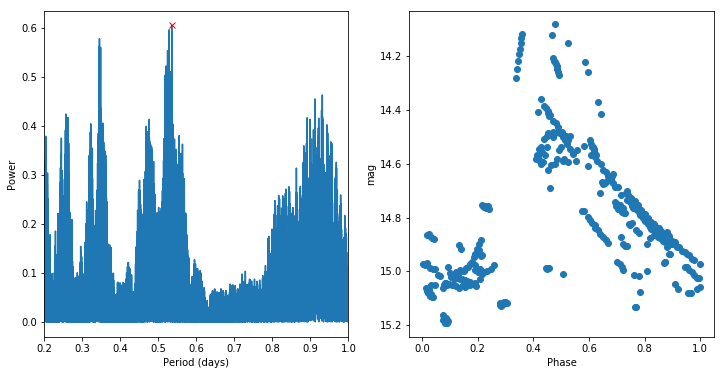

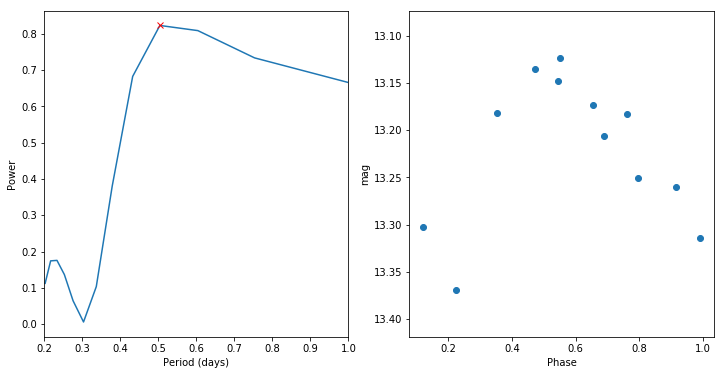

In [5]:
# Bands with the largest amount of data will work 
# Currently optimized for RR Lyrae stars, but you should be able to make it work for AGB by setting 
# min_period and max_period when calling period_search

guess_period, snr = lcv.period_search(V_band)

# Lomb-Scargle will not work for bands with too few epochs
junk_period, junk_snr = lcv.period_search(I1_band, error_threshold=0.1)


### Refine the period by minimizing the dispersion in the phased light curve

In [8]:
# You can do this process with a single, or two bands 
period = lcv.refine_period(V_band, guess_period, second_band=B_band, search_window=0.0002)
print 'Lomb Scargle period was {}'.format(guess_period)
print 'New period is {}'.format(period)

Lomb Scargle period was 0.532673914434
New period is 0.5326759


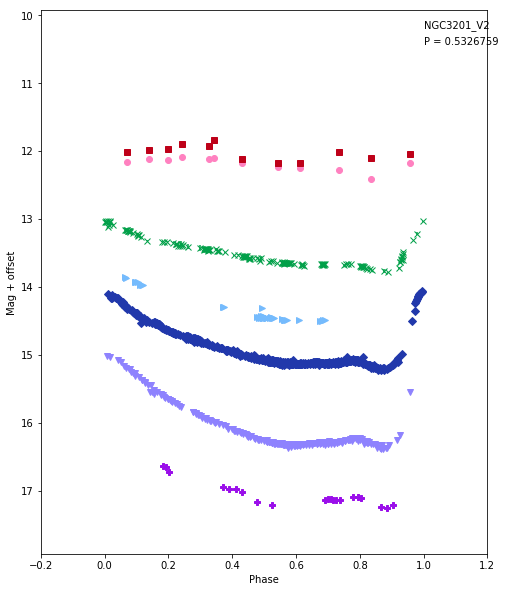

In [9]:
#check the phased light curves
lcv.phase_lcv(data, lc_name, period, plot=1)

### Fit the light curves using GLOESS

lcv_fitting.py:271: RuntimeWarning: overflow encountered in exp
  weight = err_copy * np.exp(dist**2/sigma**2)


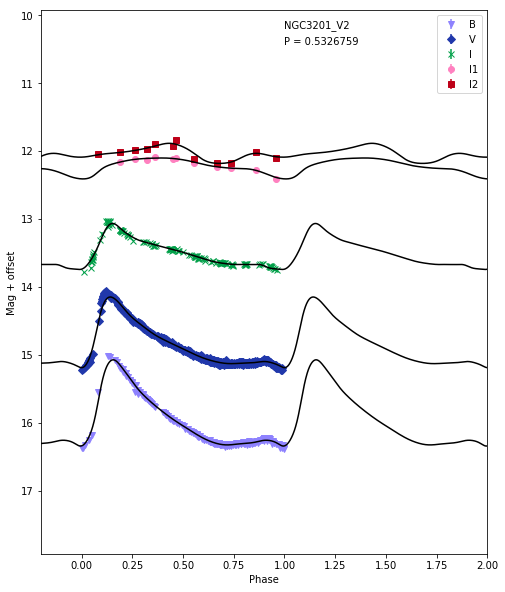

In [10]:
# This program will automatically skip any filters that have too sparse phase coverage 
#(i.e. the U and R bands in this example)

lcv_params, t0 = lcv.gloess_auto(data, period, lc_name)

In [11]:
filters = ['U', 'B', 'V', 'R', 'I', 'J', 'H', 'K', 'I1', 'I2']
print '    mag   err  amp'
for num, filt in enumerate(filters):
    if lcv_params[num][0] != 0:
        print '{:2s}: {:5.3f} {:4.3f} {:4.2f} '.format(filt, lcv_params[num][0], \
                                                lcv_params[num][1], lcv_params[num][2])


    mag   err  amp
B : 15.371 0.024 1.27 
V : 14.798 0.014 1.04 
I : 13.981 0.017 0.68 
I1: 13.217 0.027 0.31 
I2: 13.537 0.026 0.30 


In [12]:
print lcv_params, period

[( 0.        , 0.        , 0.        , 0.00000000e+00, 0.        )
 (15.37104141, 0.02370388, 1.26917672, 3.56941403e+03, 0.09090909)
 (14.79821782, 0.01415461, 1.03987455, 1.04647188e+04, 0.09090909)
 ( 0.        , 0.        , 0.        , 0.00000000e+00, 0.        )
 (13.98134343, 0.01652491, 0.67659556, 1.88538048e+03, 0.1       )
 ( 0.        , 0.        , 0.        , 0.00000000e+00, 0.        )
 ( 0.        , 0.        , 0.        , 0.00000000e+00, 0.        )
 ( 0.        , 0.        , 0.        , 0.00000000e+00, 0.        )
 (13.21715781, 0.02728582, 0.30803151, 4.99833386e+00, 0.16666667)
 (13.53735545, 0.02600352, 0.29575382, 1.36324347e+01, 0.16666667)] 0.5326759
